In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
import math
import os
import funciones

In [39]:
desc_3 = os.path.join('Proyecto Herramienta para monitoreo de la calidad de datos', '2. Datos', 'planta_3', 'planta_3_descripcion.csv')
desc_planta_3 = pd.read_csv(desc_3)
desc_planta_3

,name,unit,type_var,periodicity,critical_max_value,warning_max_value,warning_min_value,critical_min_value
0,Falla Pozo,ON/OFF,ValorIn23,1 minutes,1.0,NaN,NaN,NaN
1,Funcionando Pozo,ON/OFF,ValorIn39,1 minutes,NaN,NaN,NaN,NaN
2,Nivel pozo,m,nivel,1 minutes,NaN,NaN,NaN,NaN
3,Falla Asimetría Pozo,ON/OFF,ValorIn40,1 minutes,1.0,NaN,NaN,NaN
4,Presión pozo,bar,presion,1 minutes,NaN,NaN,NaN,NaN
5,Nivel Pozo,m,ValorIn33,1 minutes,NaN,NaN,NaN,NaN
6,Energía Total Activa Bombas Elevadoras,kWh,energia-total,1 minutes,NaN,NaN,NaN,NaN


In [40]:
planta_3 = os.path.join('Proyecto Herramienta para monitoreo de la calidad de datos', '2. Datos', 'planta_3', 'planta_3_datos.csv')
df_planta_3 = pd.read_csv(planta_3)
df_planta_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22568 entries, 0 to 22567
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   date_time                               22568 non-null  object 
 1   Nivel pozo                              21829 non-null  float64
 2   Falla Pozo                              22565 non-null  float64
 3   Energía Total Activa Bombas Elevadoras  22350 non-null  float64
 4   Nivel Pozo                              0 non-null      float64
 5   Funcionando Pozo                        0 non-null      float64
 6   Falla Asimetría Pozo                    22350 non-null  float64
 7   Presión pozo                            22351 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.4+ MB


In [41]:
df_planta_3['date_time'] = pd.to_datetime(df_planta_3['date_time'])

df_planta_3.dropna(axis=1, how='all', inplace=True)

on_off_cols = ['Falla Pozo', 'Falla Asimetría Pozo']
for col in on_off_cols:
    df_planta_3[col] = df_planta_3[col].astype(bool)
df_planta_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22568 entries, 0 to 22567
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   date_time                               22568 non-null  datetime64[ns]
 1   Nivel pozo                              21829 non-null  float64       
 2   Falla Pozo                              22568 non-null  bool          
 3   Energía Total Activa Bombas Elevadoras  22350 non-null  float64       
 4   Falla Asimetría Pozo                    22568 non-null  bool          
 5   Presión pozo                            22351 non-null  float64       
dtypes: bool(2), datetime64[ns](1), float64(3)
memory usage: 749.5 KB


In [42]:
df_planta_3.describe()

,date_time,Nivel pozo,Energía Total Activa Bombas Elevadoras,Presión pozo
count,22568,21829.000000,22350.000000,22351.000000
mean,2025-08-01 22:36:43.742467072,6.591438,600.633378,2.702661
min,2025-07-24 20:54:00,6.020000,598.000000,0.290000
25%,2025-07-28 21:38:45,6.450000,599.000000,0.405000
50%,2025-08-01 23:13:30,6.520000,601.000000,3.750000
75%,2025-08-05 21:20:15,6.560000,602.000000,3.800000
max,2025-08-09 23:59:00,10.780000,604.000000,4.350000
std,NaN,0.329512,1.865948,1.616812


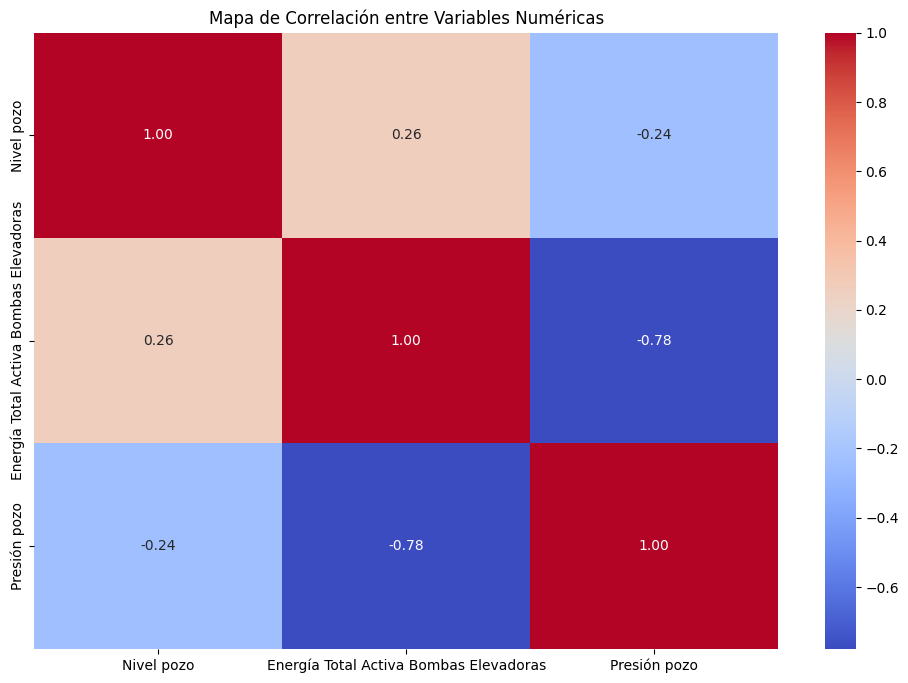

In [43]:
funciones.plot_corr(df_planta_3)

No hay que revisar rangos ya que son Nan